In [2]:
import pandas as pd

# Load the dataset

data = pd.read_csv("Telco-Customer-Churn.csv")

# Display the first few rows of the dataset
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for missing values after conversion
missing_values = data.isnull().sum()

# Encode categorical variables
encoded_data = pd.get_dummies(data.drop(columns=['customerID']), drop_first=True)

# Check the head of the encoded data
encoded_data.head(), missing_values


(   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
 0              0       1           29.85         29.85        False   
 1              0      34           56.95       1889.50         True   
 2              0       2           53.85        108.15         True   
 3              0      45           42.30       1840.75         True   
 4              0       2           70.70        151.65        False   
 
    Partner_Yes  Dependents_Yes  PhoneService_Yes  \
 0         True           False             False   
 1        False           False              True   
 2        False           False              True   
 3        False           False             False   
 4        False           False              True   
 
    MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
 0                            True              False  ...            False   
 1                           False              False  ...            False   
 2       

In [4]:
# Fill missing TotalCharges with median value based on tenure
data['TotalCharges'] = data.groupby('tenure')['TotalCharges'].transform(
    lambda x: x.fillna(x.median())
)

# Check if there are any missing values left
missing_values_after_filling = data.isnull().sum()

# Update the encoded data after filling missing values
encoded_data = pd.get_dummies(data.drop(columns=['customerID']), drop_first=True)

# Check the head of the updated encoded data
encoded_data_head_updated = encoded_data.head()

missing_values_after_filling, encoded_data_head_updated


(customerID           0
 gender               0
 SeniorCitizen        0
 Partner              0
 Dependents           0
 tenure               0
 PhoneService         0
 MultipleLines        0
 InternetService      0
 OnlineSecurity       0
 OnlineBackup         0
 DeviceProtection     0
 TechSupport          0
 StreamingTV          0
 StreamingMovies      0
 Contract             0
 PaperlessBilling     0
 PaymentMethod        0
 MonthlyCharges       0
 TotalCharges        11
 Churn                0
 dtype: int64,
    SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
 0              0       1           29.85         29.85        False   
 1              0      34           56.95       1889.50         True   
 2              0       2           53.85        108.15         True   
 3              0      45           42.30       1840.75         True   
 4              0       2           70.70        151.65        False   
 
    Partner_Yes  Dependents_Yes  PhoneService_Y

In [6]:
import pandas as pd

# Load the dataset

data = pd.read_csv("Telco-Customer-Churn.csv")

# Display the first few rows and the summary of the dataset
data_head = data.head()
data_info = data.info()
data_summary = data.describe(include='all')

data_head, data_info, data_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovies      

In [8]:
from sklearn.preprocessing import StandardScaler

# Fill remaining missing TotalCharges with overall median
overall_median_totalcharges = data['TotalCharges'].median()
data['TotalCharges'].fillna(overall_median_totalcharges, inplace=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Update the encoded data after scaling
encoded_data = pd.get_dummies(data.drop(columns=['customerID']), drop_first=True)

# Check the head of the updated encoded data
encoded_data_head_scaled = encoded_data.head()

encoded_data_head_scaled


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [9]:
# Fill missing TotalCharges with median value based on tenure
data['TotalCharges'] = data.groupby('tenure')['TotalCharges'].transform(
    lambda x: x.fillna(x.median())
)

# Check if there are any missing values left
missing_values_after_filling = data.isnull().sum()

# Update the encoded data after filling missing values
encoded_data = pd.get_dummies(data.drop(columns=['customerID']), drop_first=True)

# Display the head of the updated encoded data and missing values
encoded_data_head_updated = encoded_data.head()

missing_values_after_filling, encoded_data_head_updated


(customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
    SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
 0              0 -1.277445       -1.160323     -0.994242        False   
 1              0  0.066327       -0.259629     -0.173244         True   
 2              0 -1.236724       -0.362660     -0.959674         True   
 3              0  0.514251       -0.746535     -0.194766         True   
 4              0 -1.236724        0.197365     -0.940470        False   
 
    Partner_Yes  Dependents_Yes  PhoneService_Yes  \
 0 

In [10]:
# Fill remaining missing TotalCharges with overall median
overall_median_totalcharges = data['TotalCharges'].median()
data['TotalCharges'].fillna(overall_median_totalcharges, inplace=True)


In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [12]:
# Encode categorical variables again if needed
encoded_data = pd.get_dummies(data.drop(columns=['customerID']), drop_first=True)


In [14]:
# Display the head of the updated encoded data
encoded_data_head_scaled = encoded_data.head()

encoded_data_head_scaled


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

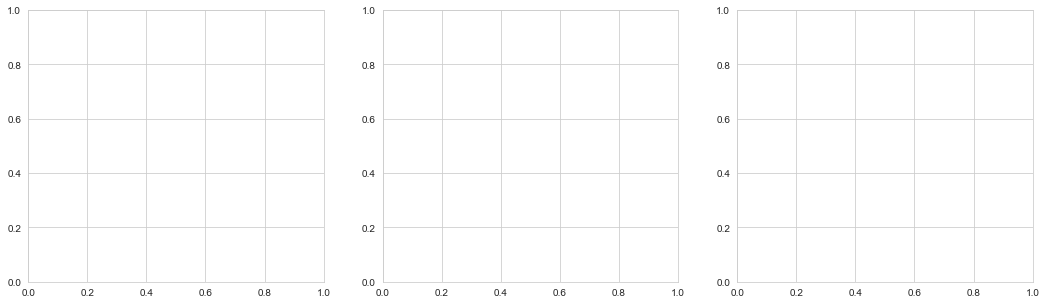

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Numerical feature distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data=data, x='tenure', kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Tenure')
sns.histplot(data=data, x='MonthlyCharges', kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Monthly Charges')
sns.histplot(data=data, x='TotalCharges', kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribution of Total Charges')
plt.tight_layout()
plt.show()

# Summary statistics
summary_stats = data.describe()
summary_stats


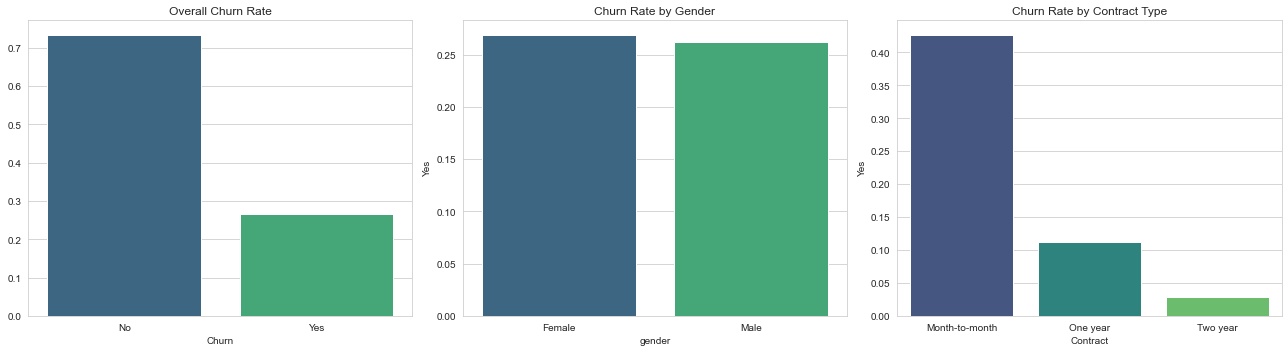

In [20]:
# Overall churn rate
churn_rate = data['Churn'].value_counts(normalize=True)

# Churn rate by gender
churn_by_gender = data.groupby('gender')['Churn'].value_counts(normalize=True).unstack()

# Churn rate by contract type
churn_by_contract = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Plot churn rates
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x=churn_rate.index, y=churn_rate.values, ax=axes[0], palette='viridis')
axes[0].set_title('Overall Churn Rate')
sns.barplot(x=churn_by_gender.index, y=churn_by_gender['Yes'], ax=axes[1], palette='viridis')
axes[1].set_title('Churn Rate by Gender')
sns.barplot(x=churn_by_contract.index, y=churn_by_contract['Yes'], ax=axes[2], palette='viridis')
axes[2].set_title('Churn Rate by Contract Type')
plt.tight_layout()
plt.show()


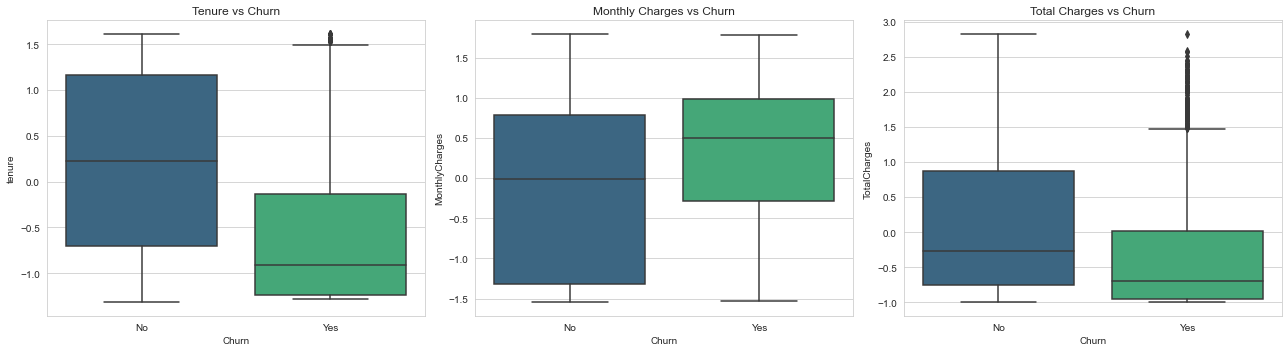

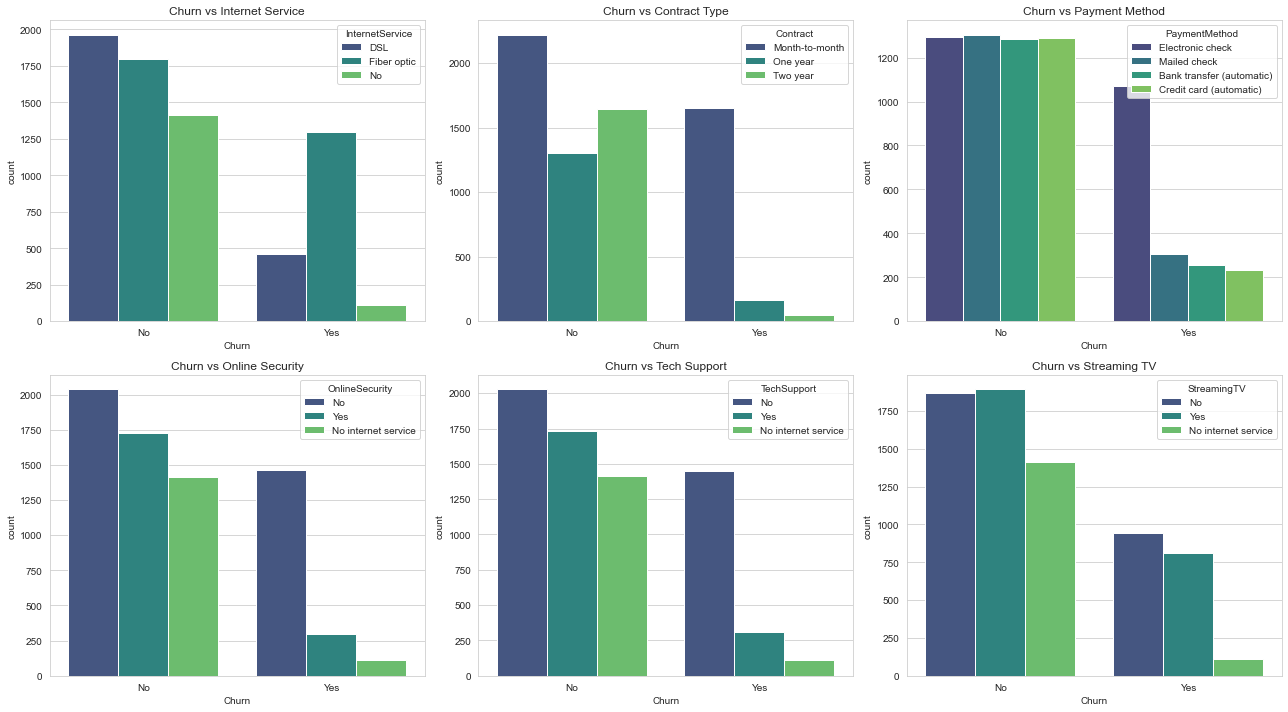

In [21]:
# Boxplots for numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='Churn', y='tenure', data=data, ax=axes[0], palette='viridis')
axes[0].set_title('Tenure vs Churn')
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axes[1], palette='viridis')
axes[1].set_title('Monthly Charges vs Churn')
sns.boxplot(x='Churn', y='TotalCharges', data=data, ax=axes[2], palette='viridis')
axes[2].set_title('Total Charges vs Churn')
plt.tight_layout()
plt.show()

# Countplots for categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.countplot(x='Churn', hue='InternetService', data=data, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Churn vs Internet Service')
sns.countplot(x='Churn', hue='Contract', data=data, ax=axes[0,1], palette='viridis')
axes[0,1].set_title('Churn vs Contract Type')
sns.countplot(x='Churn', hue='PaymentMethod', data=data, ax=axes[0,2], palette='viridis')
axes[0,2].set_title('Churn vs Payment Method')
sns.countplot(x='Churn', hue='OnlineSecurity', data=data, ax=axes[1,0], palette='viridis')
axes[1,0].set_title('Churn vs Online Security')
sns.countplot(x='Churn', hue='TechSupport', data=data, ax=axes[1,1], palette='viridis')
axes[1,1].set_title('Churn vs Tech Support')
sns.countplot(x='Churn', hue='StreamingTV', data=data, ax=axes[1,2], palette='viridis')
axes[1,2].set_title('Churn vs Streaming TV')
plt.tight_layout()
plt.show()


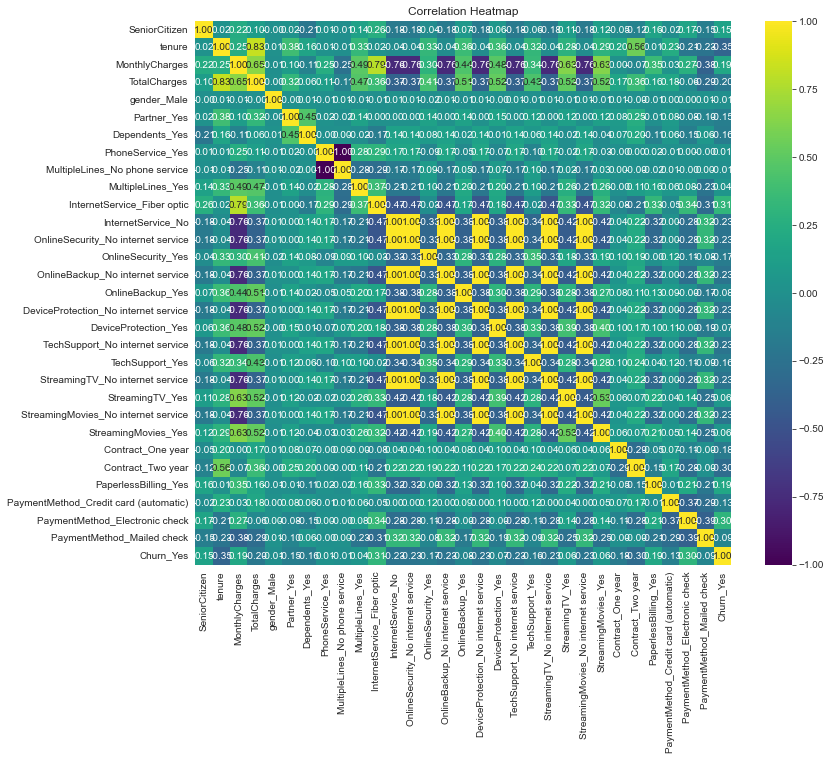

In [22]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = encoded_data.corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [23]:
# FEATURE ENGINEERING
# Create binary features
data['SeniorCitizen'] = data['SeniorCitizen'].astype('int')
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for feature in binary_features:
    data[feature] = data[feature].map({'Yes': 1, 'No': 0})
data['gender'] = data['gender'].map({'Female': 1, 'Male': 0})
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.drop(columns=['customerID'], inplace=True)  # Drop customerID as it's not useful for the model
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0,1,0,-1.277445,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,-1.160323,-0.994242,0
1,NaN,0,0,0,0.066327,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,-0.259629,-0.173244,0
2,NaN,0,0,0,-1.236724,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,-0.362660,-0.959674,1
3,NaN,0,0,0,0.514251,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),-0.746535,-0.194766,0
4,NaN,0,0,0,-1.236724,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,0.197365,-0.940470,1


In [24]:
# Interaction features
data['TotalPayment'] = data['tenure'] * data['MonthlyCharges']
data['AvgChargesPerTenure'] = data['TotalCharges'] / (data['tenure'] + 1e-10)  # To avoid division by zero
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalPayment,AvgChargesPerTenure
0,NaN,0,1,0,-1.277445,0,No phone service,DSL,No,Yes,...,No,No,Month-to-month,1,Electronic check,-1.160323,-0.994242,0,1.482248,0.778305
1,NaN,0,0,0,0.066327,1,No,DSL,Yes,No,...,No,No,One year,0,Mailed check,-0.259629,-0.173244,0,-0.017221,-2.611953
2,NaN,0,0,0,-1.236724,1,No,DSL,Yes,Yes,...,No,No,Month-to-month,1,Mailed check,-0.362660,-0.959674,1,0.448511,0.775981
3,NaN,0,0,0,0.514251,0,No phone service,DSL,Yes,No,...,No,No,One year,0,Bank transfer (automatic),-0.746535,-0.194766,0,-0.383907,-0.378737
4,NaN,0,0,0,-1.236724,1,No,Fiber optic,No,No,...,No,No,Month-to-month,1,Electronic check,0.197365,-0.940470,1,-0.244086,0.760452


In [25]:
# Aggregate features
# Binning tenure into categories
data['tenure_bin'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=[0, 1, 2, 3, 4, 5])

# Binning MonthlyCharges into categories
data['MonthlyCharges_bin'] = pd.cut(data['MonthlyCharges'], bins=[0, 35, 70, 105, 140], labels=[0, 1, 2, 3])

# Binning TotalCharges into categories
data['TotalCharges_bin'] = pd.cut(data['TotalCharges'], bins=[0, 1000, 3000, 5000, 7000, 9000], labels=[0, 1, 2, 3, 4])

data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalPayment,AvgChargesPerTenure,tenure_bin,MonthlyCharges_bin,TotalCharges_bin
0,NaN,0,1,0,-1.277445,0,No phone service,DSL,No,Yes,...,1,Electronic check,-1.160323,-0.994242,0,1.482248,0.778305,NaN,NaN,NaN
1,NaN,0,0,0,0.066327,1,No,DSL,Yes,No,...,0,Mailed check,-0.259629,-0.173244,0,-0.017221,-2.611953,0,NaN,NaN
2,NaN,0,0,0,-1.236724,1,No,DSL,Yes,Yes,...,1,Mailed check,-0.362660,-0.959674,1,0.448511,0.775981,NaN,NaN,NaN
3,NaN,0,0,0,0.514251,0,No phone service,DSL,Yes,No,...,0,Bank transfer (automatic),-0.746535,-0.194766,0,-0.383907,-0.378737,0,NaN,NaN
4,NaN,0,0,0,-1.236724,1,No,Fiber optic,No,No,...,1,Electronic check,0.197365,-0.940470,1,-0.244086,0.760452,NaN,0,NaN


In [26]:
# Creating tenure groups
data['tenure_group'] = data['tenure'].apply(lambda x: 1 if x <= 12 else (2 if x <= 24 else (3 if x <= 36 else (4 if x <= 48 else (5 if x <= 60 else 6)))))
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalPayment,AvgChargesPerTenure,tenure_bin,MonthlyCharges_bin,TotalCharges_bin,tenure_group
0,NaN,0,1,0,-1.277445,0,No phone service,DSL,No,Yes,...,Electronic check,-1.160323,-0.994242,0,1.482248,0.778305,NaN,NaN,NaN,1
1,NaN,0,0,0,0.066327,1,No,DSL,Yes,No,...,Mailed check,-0.259629,-0.173244,0,-0.017221,-2.611953,0,NaN,NaN,1
2,NaN,0,0,0,-1.236724,1,No,DSL,Yes,Yes,...,Mailed check,-0.362660,-0.959674,1,0.448511,0.775981,NaN,NaN,NaN,1
3,NaN,0,0,0,0.514251,0,No phone service,DSL,Yes,No,...,Bank transfer (automatic),-0.746535,-0.194766,0,-0.383907,-0.378737,0,NaN,NaN,1
4,NaN,0,0,0,-1.236724,1,No,Fiber optic,No,No,...,Electronic check,0.197365,-0.940470,1,-0.244086,0.760452,NaN,0,NaN,1


In [27]:
# One-hot encoding for categorical features
categorical_features = ['Contract', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'PaymentMethod']

data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,NaN,0,1,0,-1.277445,0,No phone service,1,-1.160323,-0.994242,...,False,False,False,False,False,False,False,False,True,False
1,NaN,0,0,0,0.066327,1,No,0,-0.259629,-0.173244,...,True,False,False,False,False,False,False,False,False,True
2,NaN,0,0,0,-1.236724,1,No,1,-0.362660,-0.959674,...,False,False,False,False,False,False,False,False,False,True
3,NaN,0,0,0,0.514251,0,No phone service,0,-0.746535,-0.194766,...,True,False,True,False,False,False,False,False,False,False
4,NaN,0,0,0,-1.236724,1,No,1,0.197365,-0.940470,...,False,False,False,False,False,False,False,False,True,False


In [28]:
data.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,NaN,0,1,0,-1.277445,0,No phone service,1,-1.160323,-0.994242,...,False,False,False,False,False,False,False,False,True,False
1,NaN,0,0,0,0.066327,1,No,0,-0.259629,-0.173244,...,True,False,False,False,False,False,False,False,False,True
2,NaN,0,0,0,-1.236724,1,No,1,-0.362660,-0.959674,...,False,False,False,False,False,False,False,False,False,True
3,NaN,0,0,0,0.514251,0,No phone service,0,-0.746535,-0.194766,...,True,False,True,False,False,False,False,False,False,False
4,NaN,0,0,0,-1.236724,1,No,1,0.197365,-0.940470,...,False,False,False,False,False,False,False,False,True,False


In [2]:
# Handle missing values
# For numeric features, you can fill missing values with the median or mean
# For this example, let's fill with median for simplicity

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalPayment', 'AvgChargesPerTenure']

for feature in numeric_features:
    data[feature].fillna(data[feature].median(), inplace=True)

# Ensure no infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Double check for any remaining NaN values
print("Remaining missing values:\n", data.isna().sum())

# Drop rows with remaining NaN values if any
data.dropna(inplace=True)


NameError: name 'data' is not defined

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

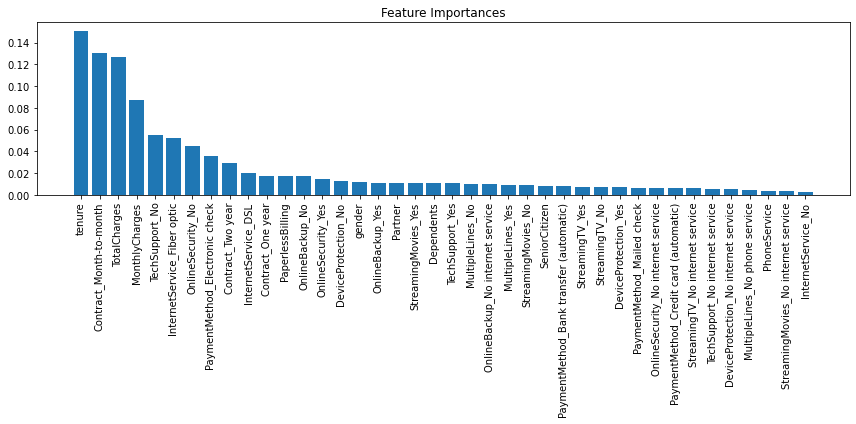

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

data = pd.read_csv('Telco-Customer-Churn.csv')

# Display first few rows
print(data.head())

# Display info
print(data.info())

# Drop customerID column as it's not useful for prediction
data.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill missing 'TotalCharges' with the median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Encode binary categorical features
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for feature in binary_features:
    data[feature] = LabelEncoder().fit_transform(data[feature])

# Encode other categorical features using one-hot encoding
categorical_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaymentMethod']

data = pd.get_dummies(data, columns=categorical_features)

# Split data into features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Model")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# Hyperparameter tuning for the best model (Random Forest in this example)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Plotting feature importances for the best model
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


Logistic Regression Model
Accuracy: 0.8197303051809794
Precision: 0.683076923076923
Recall: 0.5951742627345844
F1-Score: 0.6361031518624641
Confusion Matrix:
 [[933 103]
 [151 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



Random Forest Model
Accuracy: 0.8005677785663591
Precision: 0.6678832116788321
Recall: 0.4906166219839142
F1-Score: 0.5656877897990726
Confusion Matrix:
 [[945  91]
 [190 183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72   

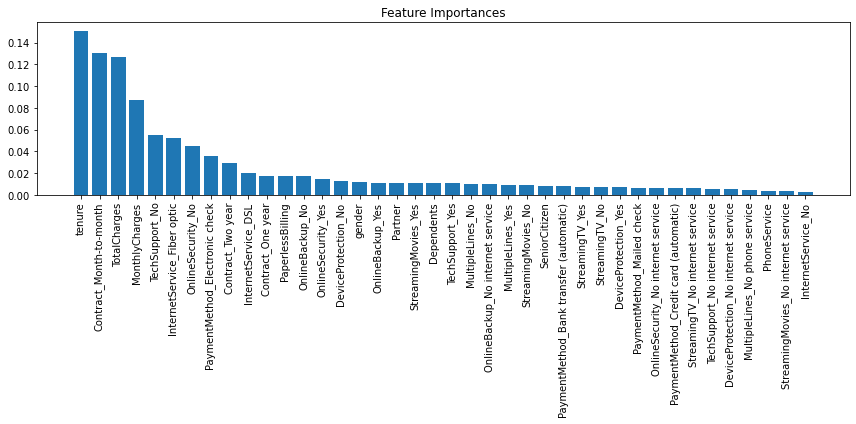

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

data = pd.read_csv('Telco-Customer-Churn.csv')

# Drop customerID column as it's not useful for prediction
data.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill missing 'TotalCharges' with the median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Encode binary categorical features
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for feature in binary_features:
    data[feature] = LabelEncoder().fit_transform(data[feature])

# Encode other categorical features using one-hot encoding
categorical_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaymentMethod']

data = pd.get_dummies(data, columns=categorical_features)

# Split data into features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    print(f"{name} Model")
    print("Accuracy:", results[name]['Accuracy'])
    print("Precision:", results[name]['Precision'])
    print("Recall:", results[name]['Recall'])
    print("F1-Score:", results[name]['F1-Score'])
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# Hyperparameter tuning for the best model (Random Forest in this example)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

best_model_results = {
    'Accuracy': accuracy_score(y_test, y_pred_best),
    'Precision': precision_score(y_test, y_pred_best),
    'Recall': recall_score(y_test, y_pred_best),
    'F1-Score': f1_score(y_test, y_pred_best)
}

print("Best Random Forest Model After Tuning")
print("Accuracy:", best_model_results['Accuracy'])
print("Precision:", best_model_results['Precision'])
print("Recall:", best_model_results['Recall'])
print("F1-Score:", best_model_results['F1-Score'])
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Plotting feature importances for the best model
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()
